# Statement: Predict Heart Disease from the given dataset using Classification 

### Heart Disease Prediction using Machine Learning using Classification algorithm

# Variable - Each attribute is a potential risk factor. There are both demographic, behavioural & medical risk factors
### 1. Demographic: sex: male and age: age of the patient;
### 2. Behavioural: currentSmoker(whether or not the patient is a current smoker or not) and cigsPerDay(no of cigarettes that the person somked on average)  
### 3. Medical[history]: BPMeds(whether or not the patient was on blood pressure medication) and prevalentStroke(whether or not the patient had previously a stroke) and diabetes(whether or not the patient had diabetes)
### 4. Medical[current]: totCol(total cholesterol level) and sysBP(systotic blood pressure) and diaBP(diastolic blood pressure) and BMI(Body Mass Index) and heartRate and glucose
### 5. Predict variable[desired target]: 10 year risk of coronary heart disease CHD (in binary 0 or 1)


## Load required Libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

## Load the Dataset
### The dataset provides the patient's information, It includes over 4,000 records and 15 attributes.

In [2]:
df=pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


## Anaysis the data

In [13]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.929920,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,233.928740,132.352407,82.893464,25.686331,75.861019,74.462482,0.151958
std,0.495022,8.572160,1.053018,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,51.169478,22.038097,11.910850,4.420935,12.081533,32.869879,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.500000,48.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.050000,68.000000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [14]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## Check Missing Values

In [16]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Correlation Matrix

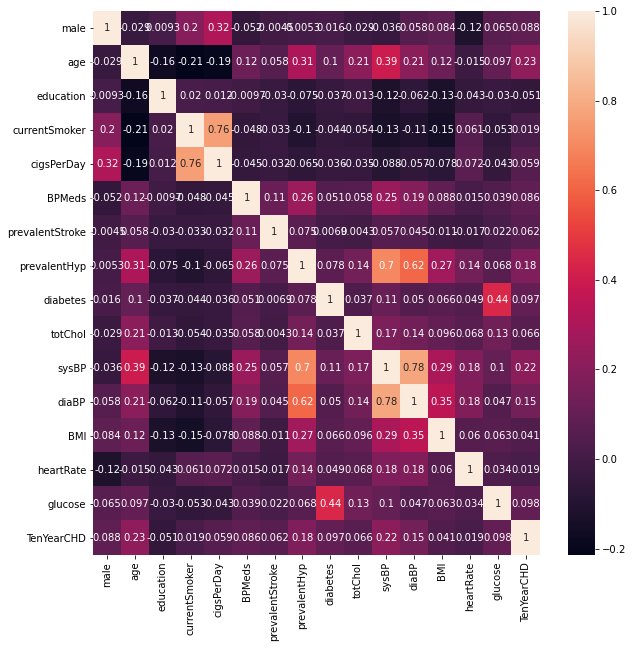

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## PairPlot

<Figure size 720x720 with 0 Axes>

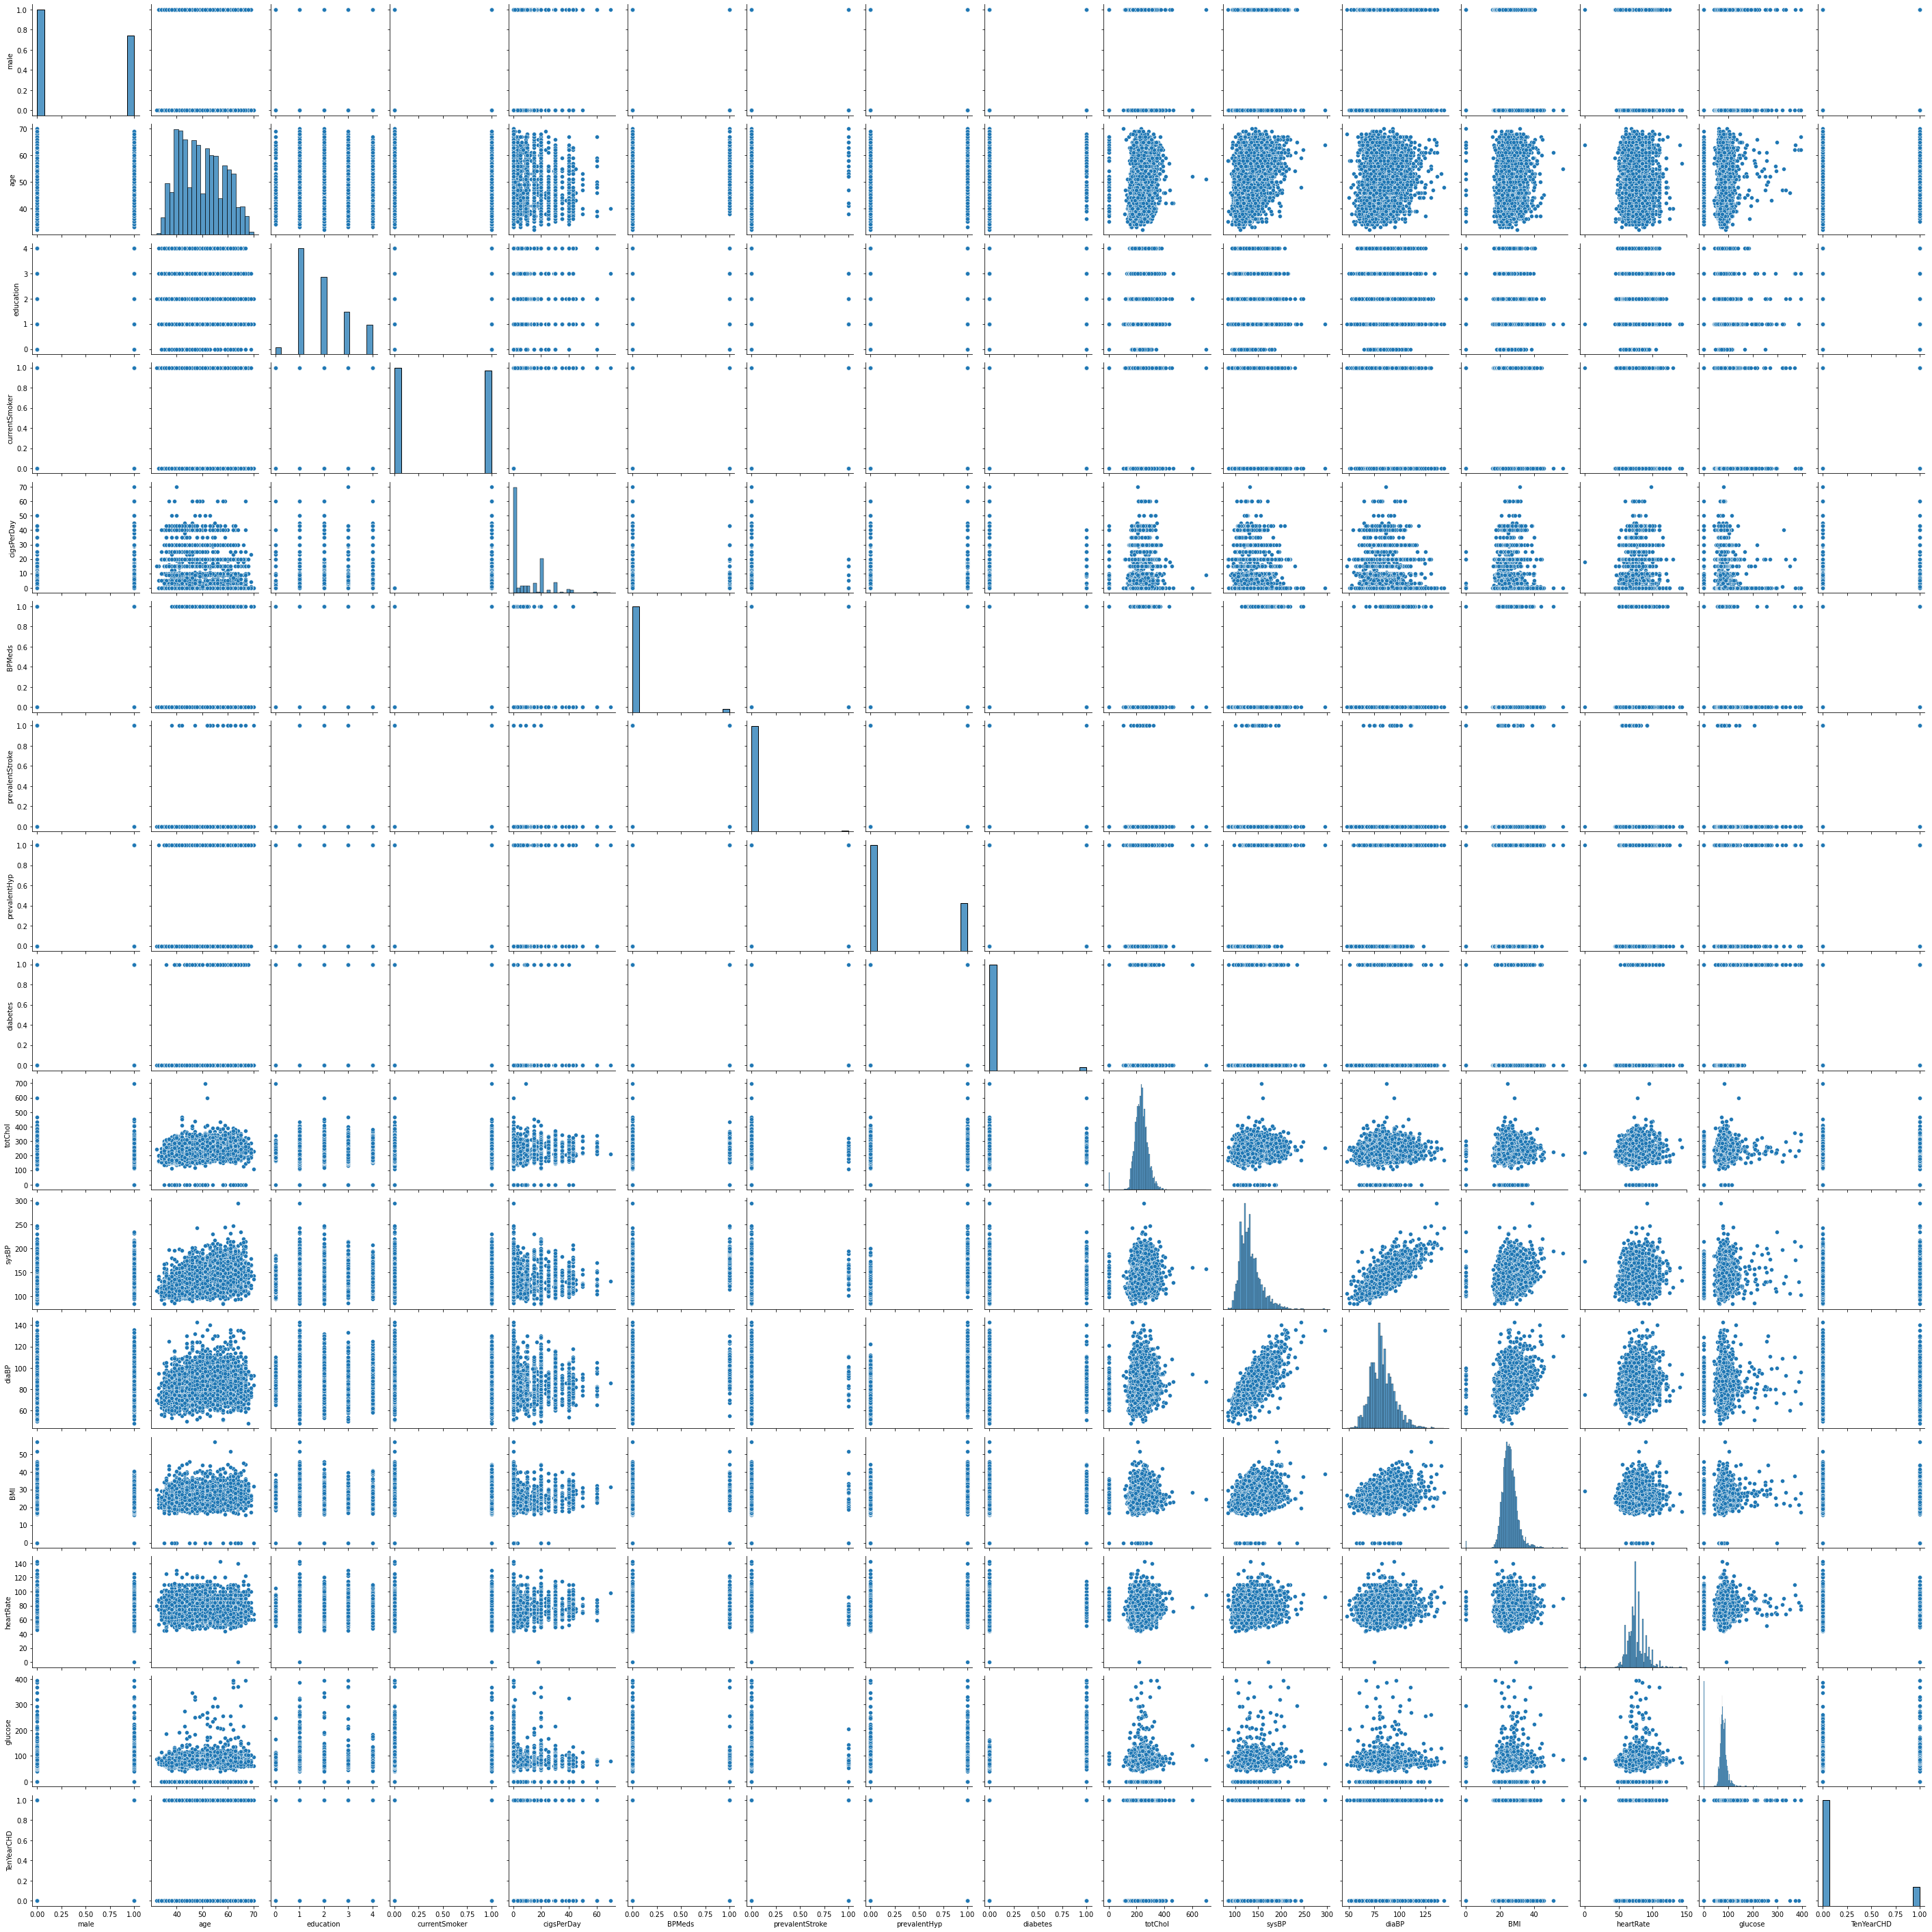

In [25]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

## Catplot to compare Male currentSmoker or not

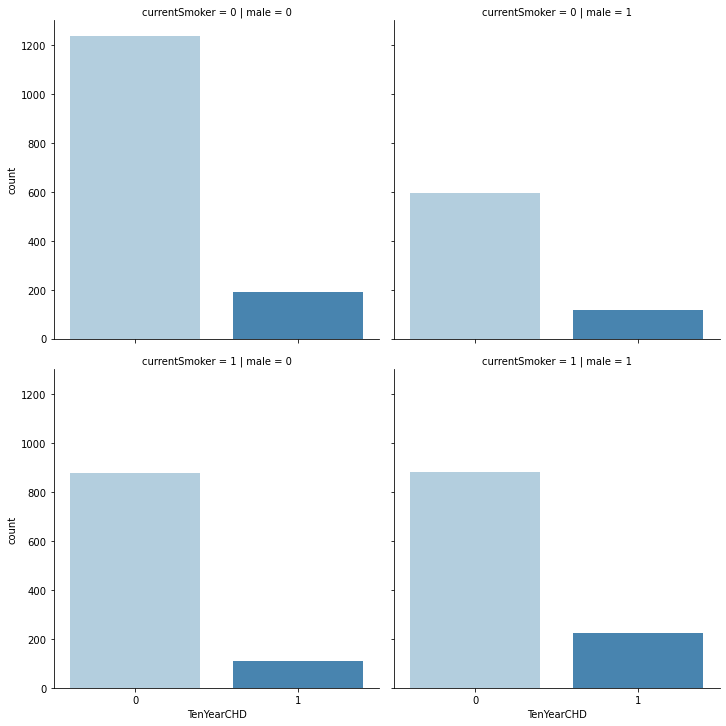

In [21]:
sns.catplot(data=df, kind='count', x='TenYearCHD', col='male',row='currentSmoker', palette='Blues')
plt.show()

## plot of 10 Year Coronary Heart Disease

In [5]:
count=pd.value_counts(df['TenYearCHD'])
count

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [6]:
df=df.fillna(0)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

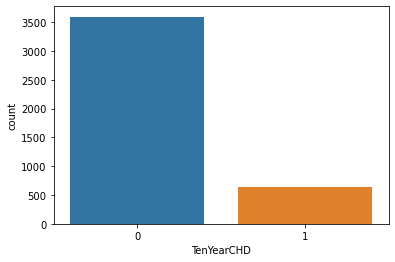

In [7]:
sns.countplot(x='TenYearCHD',data=df)

In [8]:
nothaving_diseases = df[df.TenYearCHD == 0].index
having_diseases = np.array(df[df['TenYearCHD'] == 1].index)

random_index = np.array(np.random.choice(having_diseases, len(nothaving_diseases)))

oversample = np.concatenate([nothaving_diseases, random_index])

oversample = df.iloc[oversample, :]

x = oversample.drop(columns=['TenYearCHD'])
y = oversample['TenYearCHD']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

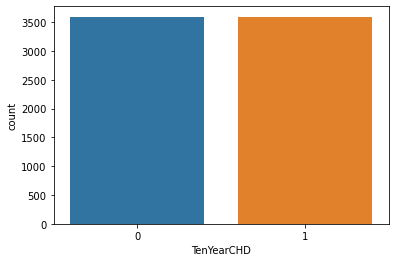

In [9]:
import seaborn as sns
sns.countplot(x='TenYearCHD',data=oversample)

## Machine Learning Algorithms

In [10]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
svm=SVC(C=0.1)
knn=KNeighborsClassifier(n_neighbors=5)
GNB=GaussianNB()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
bc=BaggingClassifier()
models={"Logistic Regression":lr,'Decision tree classifier':dtc,'Random Forest Classifier':rfc,'Gradient boost classifier':gbc,'Bagging classifier':bc,"KNeighborsClassifier":knn,"Support vector machine":svm,"GaussianNB":GNB}
accuracy=[]
for name,model in models.items():
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    accuracy.append(acc)
    print("For ",name," ,The Accuracy is :",acc)

For  Logistic Regression  ,The Accuracy is : 0.650904033379694
For  Decision tree classifier  ,The Accuracy is : 0.9200278164116829
For  Random Forest Classifier  ,The Accuracy is : 0.972183588317107
For  Gradient boost classifier  ,The Accuracy is : 0.7482614742698191
For  Bagging classifier  ,The Accuracy is : 0.9520166898470097
For  KNeighborsClassifier  ,The Accuracy is : 0.8011126564673157
For  Support vector machine  ,The Accuracy is : 0.6467315716272601
For  GaussianNB  ,The Accuracy is : 0.60778859527121


## PLot of Accuracy 

No handles with labels found to put in legend.


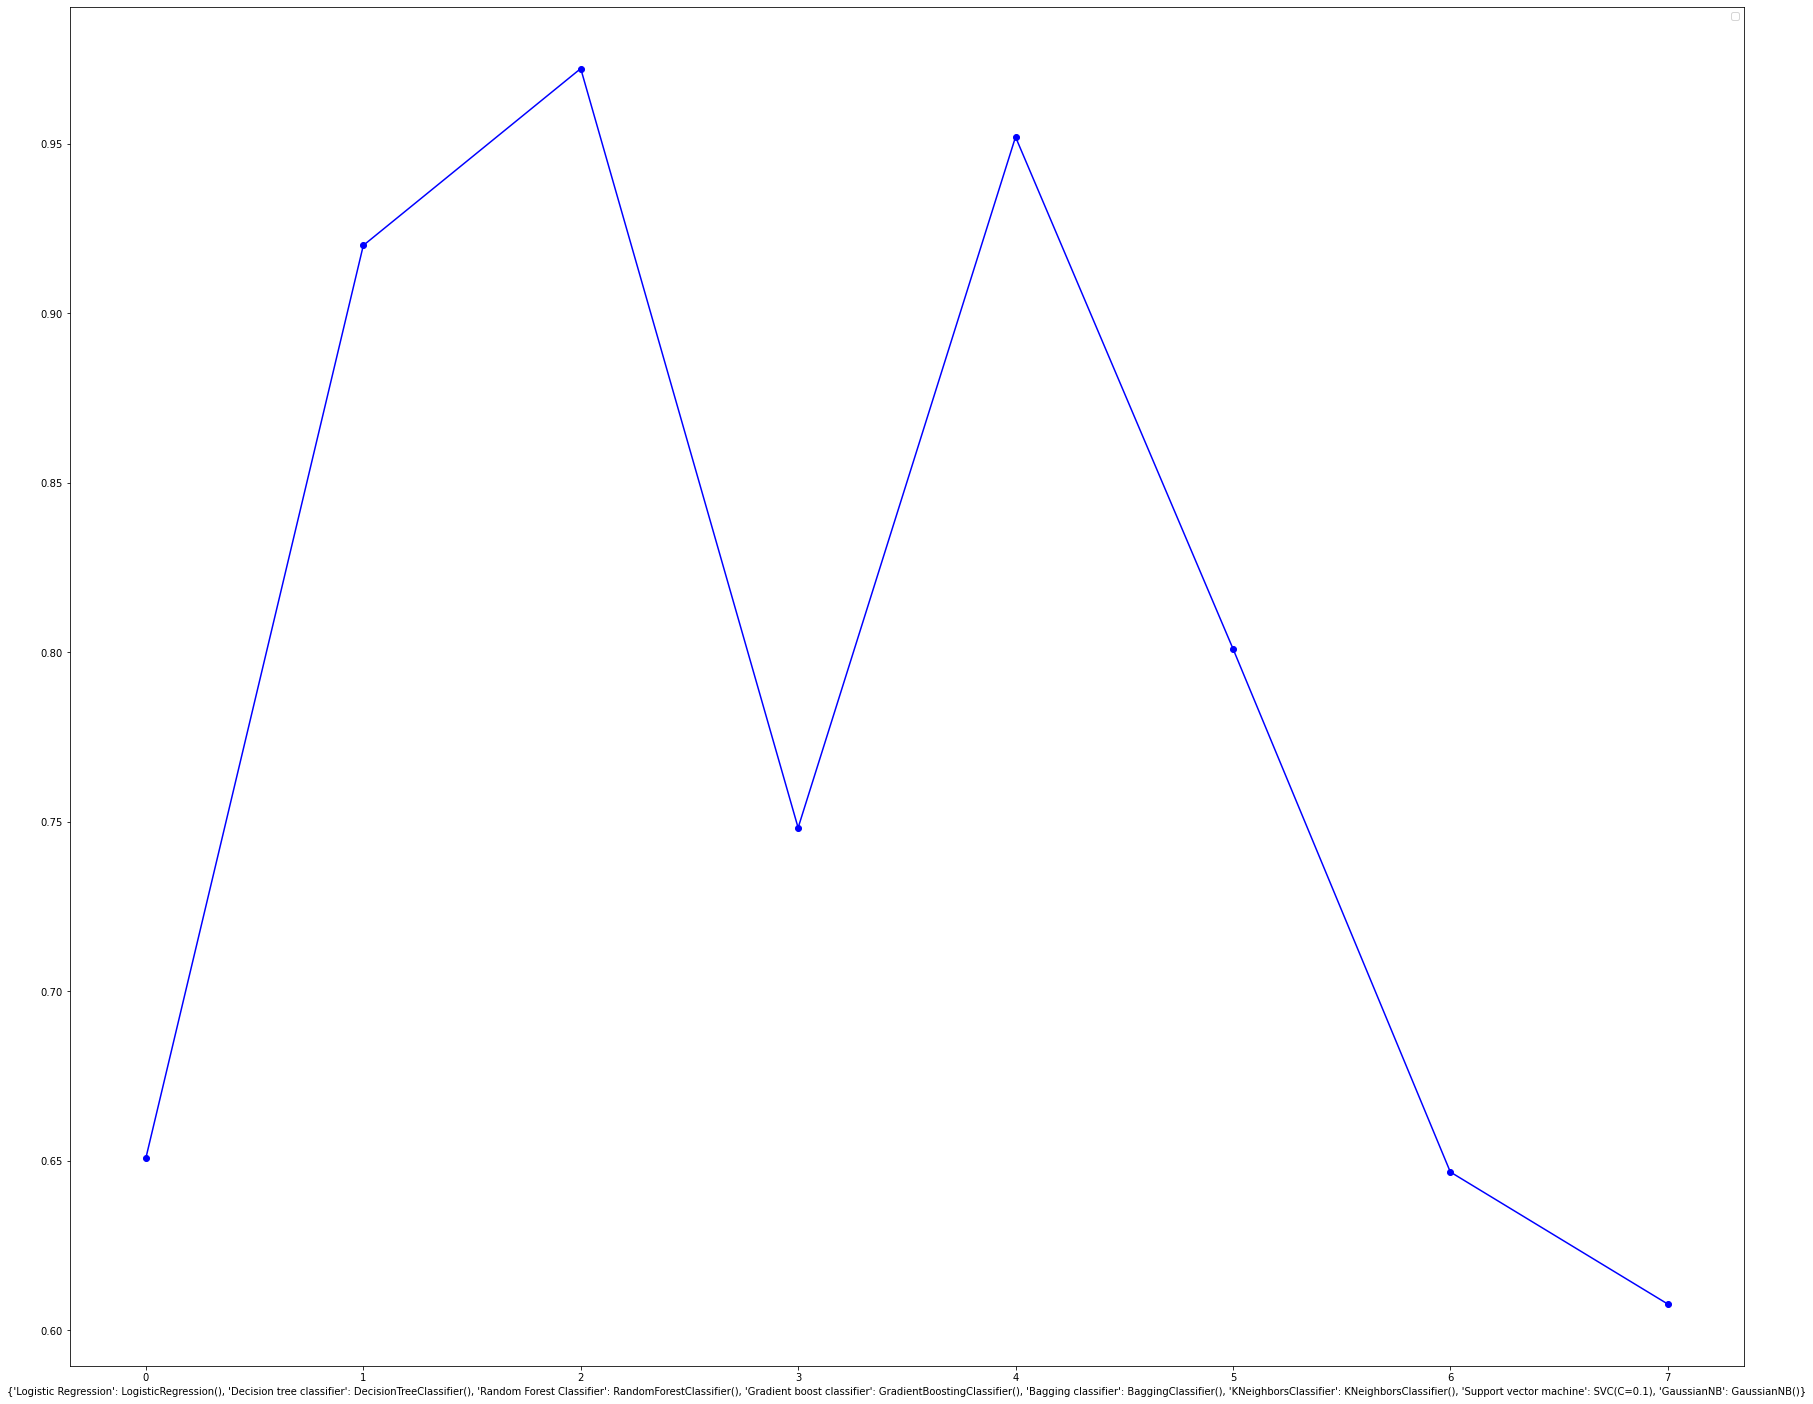

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,25))
plt.plot(accuracy,'b-o')
plt.xlabel(models)
plt.legend()